In [21]:
import sqlalchemy as db
import matplotlib.pyplot as plt
import numpy as np

In [22]:
class Section:
    def __init__(self, term, year, campus, college, dept, subject, course, section, course_title, instructor_name,
                 instructor_group, course_type, course_level, online, enroll, num_resp, resp_rate, hours_per_week,
                 interest, challenge, learned, course_rating, effect, availability, respect, instructor, course_err,
                 instructor_err):
        self.term = term  # fall, spring, summer
        self.year = int(year)  # 4-digit year (e.g., 2019)
        self.campus = campus  # BD = Boulder, CE = Continuing Education
        self.college = college  # 4-letter college code (e.g., BUSN = Business)
        # abbreviated department code (e.g., MB = music)
        self.department = dept
        # 4-letter subject code (e.g., ACCT = Accounting)
        self.subject = subject
        self.course = course  # 4-digit course number
        self.section = section  # section number (e.g., 105, 101R)
        self.courseTitle = course_title  # descriptive course title
        self.instructorName = instructor_name  # instructor name

        self.instructorGroup = instructor_group
        # TTT = Tenured or Tenure-Track, INST = Instructor or Senior Instructor, TA = Teaching Assistant, OTH = Other

        self.courseType = course_type  # e.g., LEC = Lecture
        # Lower (1xxx-2xxx), Upper (3xxx,4xxx), or Graduate (5xxx+)
        self.courseLevel = course_level
        self.online = online  # Y = FCQs were administered online
        self.enrollment = int(enroll)  # number of students enrolled in the course
        self.responses = int(num_resp)  # number of students who completed FCP
        self.responseRate = resp_rate  # percentage of students who completed FCQ

        self.hoursPerWeek = float(hours_per_week)
        # 1.0-1.9 = 0-3 hours per week
        # 2.0-2.9 = 4-6 hours per week
        # 3.0-3.9 = 7-9 hours per week
        # 4.0-4.9 = 10-12 hours per week
        # 5.0-5.9 = 13-15 hours per week
        # 6.0 = 16+ hours per week

        self.interest = float(interest)  # Scale: 1 = lowest, 6 = highest
        self.challenge = float(challenge)  # Scale: 1 = lowest, 6 = highest
        self.learned = float(learned)  # Scale: 1 = lowest, 6 = highest
        self.courseRating = float(course_rating)  # Scale: 1 = lowest, 6 = highest
        self.effect = float(effect)  # Scale: 1 = lowest, 6 = highest
        self.instructorAvailability = float(availability)  # Scale: 1 = lowest, 6 = highest
        self.instructorRespect = float(respect)  # Scale: 1 = lowest, 6 = highest
        self.instructorRating = float(instructor)  # Scale: 1 = lowest, 6 = highest
        self.stdCourseRating = float(course_err)  # standard deviation of course rating
        # standard deviation of instructor rating
        self.stdInstructorRating = float(instructor_err)

In [23]:
engine = db.create_engine('sqlite:///website/fcq.db')
connection = engine.connect()
metadata = db.MetaData()
fcq = db.Table('fcq', metadata, autoload=True, autoload_with=engine)

In [31]:
query = db.select([fcq])

In [32]:
result_proxy = connection.execute(query)
result_set = result_proxy.fetchall()

In [33]:
sections = []
for row in result_set:
    try:
        sec = Section(row.Term, row.Year, row.Campus, row.College, row.Dept, row.Sbjct, row.Crse, row.Sect, row.CrseTitle, row.InstructorName, row.InstrGrp, row.CrseType, row.CrseLvl, row.Onlin, row.Enroll, row.NumResp, row.RespRate, row.HrsPerWk, row.Interest, row.Challenge, row.Learned, row.Course, row.Effect, row.Avail, row.Respect, row.Instr, row.SDCrse, row.SDInstr)
        sections.append(sec)
    except:
        continue

(array([ 6478.,   890., 74884.,  1457., 12773.,  2660.,  4141.,  3931.,
         2062.,  1350.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

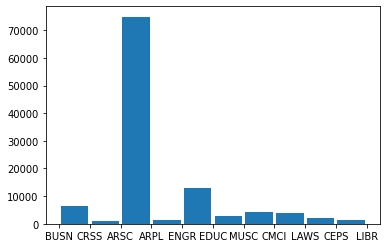

In [47]:
plt.hist([s.college for s in sections], rwidth = 0.9)

In [44]:
import sys

In [64]:
query = db.select([fcq]).where(fcq.c.College == "ENGR")
result_proxy = connection.execute(query)
engr = result_proxy.fetchall()
engr_sections = []
for row in engr:
    try:
        sec = Section(row.Term, row.Year, row.Campus, row.College, row.Dept, row.Sbjct, row.Crse, row.Sect, row.CrseTitle, row.InstructorName, row.InstrGrp, row.CrseType, row.CrseLvl, row.Onlin, row.Enroll, row.NumResp, row.RespRate, row.HrsPerWk, row.Interest, row.Challenge, row.Learned, row.Course, row.Effect, row.Avail, row.Respect, row.Instr, row.SDCrse, row.SDInstr)
        engr_sections.append(sec)
    except:
        continue

In [65]:
query = db.select([fcq]).where(fcq.c.College == "ENGR")
result_proxy = connection.execute(query)
busn = result_proxy.fetchall()
busn_sections = []
for row in busn:
    try:
        sec = Section(row.Term, row.Year, row.Campus, row.College, row.Dept, row.Sbjct, row.Crse, row.Sect, row.CrseTitle, row.InstructorName, row.InstrGrp, row.CrseType, row.CrseLvl, row.Onlin, row.Enroll, row.NumResp, row.RespRate, row.HrsPerWk, row.Interest, row.Challenge, row.Learned, row.Course, row.Effect, row.Avail, row.Respect, row.Instr, row.SDCrse, row.SDInstr)
        busn_sections.append(sec)
    except:
        continue

In [66]:
query = db.select([fcq]).where(fcq.c.College == "ARSC")
result_proxy = connection.execute(query)
arsc = result_proxy.fetchall()
arsc_sections = []
for row in arsc:
    try:
        sec = Section(row.Term, row.Year, row.Campus, row.College, row.Dept, row.Sbjct, row.Crse, row.Sect, row.CrseTitle, row.InstructorName, row.InstrGrp, row.CrseType, row.CrseLvl, row.Onlin, row.Enroll, row.NumResp, row.RespRate, row.HrsPerWk, row.Interest, row.Challenge, row.Learned, row.Course, row.Effect, row.Avail, row.Respect, row.Instr, row.SDCrse, row.SDInstr)
        arsc_sections.append(sec)
    except:
        continue

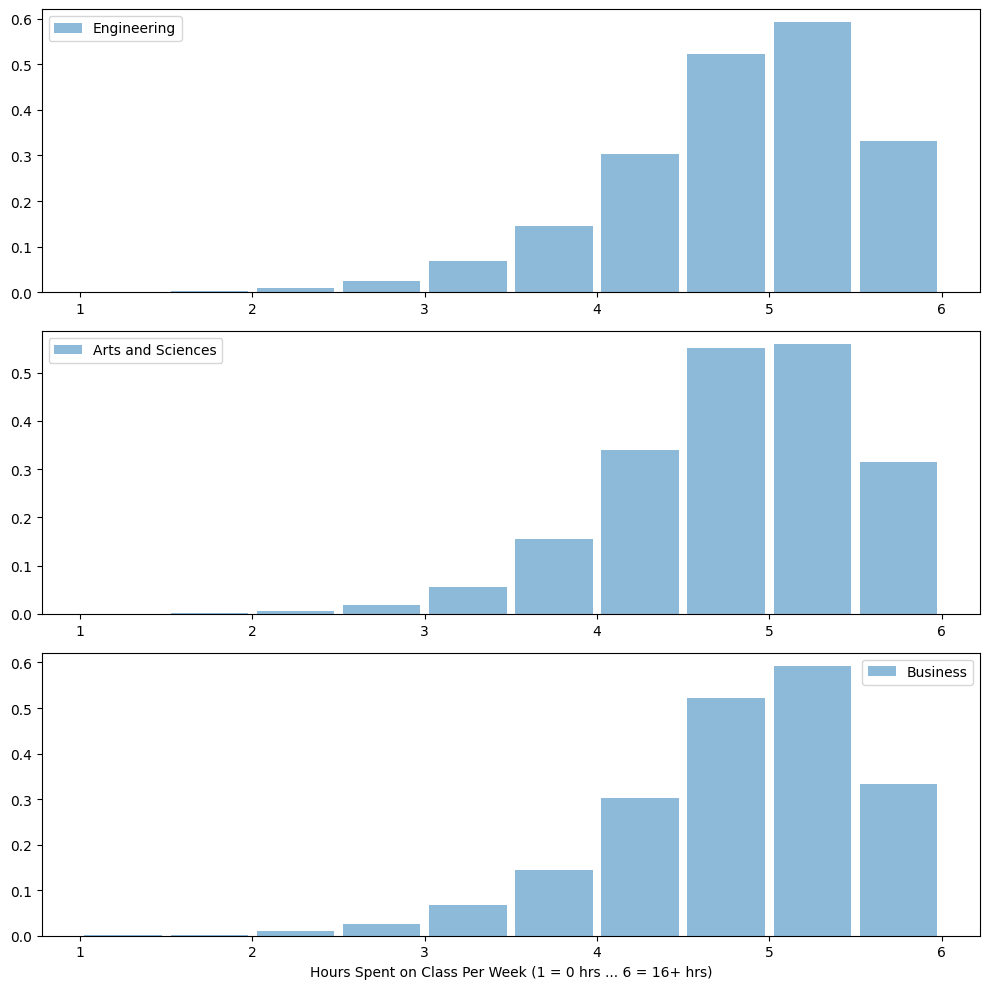

In [80]:
plt.style.use('default')
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].hist([s.courseRating for s in engr_sections], rwidth = 0.9, alpha = 0.5, density=True, label="Engineering")
ax[0].legend()
ax[1].hist([s.courseRating for s in arsc_sections], rwidth = 0.9, alpha = 0.5, density=True, label="Arts and Sciences")
ax[1].legend()
ax[2].hist([s.courseRating for s in busn_sections], rwidth = 0.9, alpha = 0.5, density=True, label="Business")
ax[2].legend()

plt.xlabel("Hours Spent on Class Per Week (1 = 0 hrs ... 6 = 16+ hrs)")
plt.tight_layout()
plt.savefig("hours.png", dpi = 300)